In [16]:
import sympy as sp
from sympy import *
init_printing()
from IPython.display import display, Latex, HTML
import numpy as np

### Doing SVD (semi-)manually

In [17]:
A = Matrix([[0,1], [1, 0], [1, 1]])

# Step 1: Find eigenvalues of AtA
AtA = A.T*A
AtA.eigenvals()

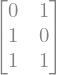

In [18]:
A

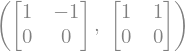

In [19]:
# Step 2: Find corresponding eigenspace - since we are using AtA we will be finding the right eigenvectors
(AtA-3*eye(2)).rref()[0], (AtA-1*eye(2)).rref()[0]

In [20]:
v1 = Matrix([1,1])
v1 = v1.normalized()
v2 = Matrix([-1, 1])
v2 = v2.normalized()

In [21]:
# Step 3a: We derive the u vectors from the v vectors
u1 = (1/sqrt(3))*A*v1
u2 = A*v2

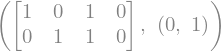

In [22]:
# Step 3b: Since n > m (more rows than columns) we will have less v vectors than u vectors.
# We use the following trick to obtain the last vector: u1.dot(u3) = 0 AND u2.dot(u3) = 0.
# This will give us two equations with three unknowns. That means one free variable thus dim nul = 1
# This one vectors will be orthogonal to u1 and u2 since we defined in that way
Matrix([[1, 1, 2, 0], [1, -1, 0, 0]]).rref()

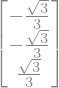

In [23]:
u3 = Matrix([-1, -1, 1])
u3 = u3.normalized()
u3

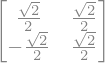

In [24]:
# Step 4a: We create V and Vt:
V = v1.row_join(v2)
Vt = V.T
Vt

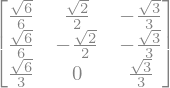

In [25]:

U = u1.row_join(u2).row_join(u3)
U

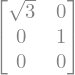

In [26]:
# Step 4bc: We create S as a diagonal matrix and fill in with zeros to obtain same size as A
s1 = sqrt(3)
s2 = sqrt(1)

S = diag(s1, s2).col_join(zeros(1,2))
S

In [27]:
# Step 5: We test
U*S*Vt == A

True

### Doing SVD (almost) automatically

In [28]:
A = Matrix([[0, 1], [1, 0], [1,1]])

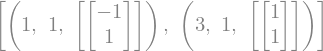

In [29]:
# Step 1+2
AtA = A.T*A
vecs = AtA.eigenvects()
vecs

In [30]:
# Step 3a:
u1 = (s1**-1)*A*v1
u2 = (s2**-1)*A*v2

# We are missing obe vector for U
u3 = Matrix([u1.T, u2.T]).nullspace()[0].normalized()

In [31]:
# Step 4
V = v1.row_join(v2)
Vt = V.T
U = u1.row_join(u2).row_join(u3)
S = diag(s1, s2).col_join(zeros(1,2))
display(Latex("$$A = {}{}{}$$".format(latex(U), latex(S), latex(Vt))))

<IPython.core.display.Latex object>

In [32]:
# Pseudoinverse
S_plus = (S.T).applyfunc(lambda x: 1/x if x != 0 else 0)

A_plus = V*S_plus*(U.T)


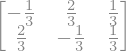

In [33]:
A_plus

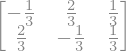

In [34]:
A.pinv()